In [51]:
import tensorflow as tf

## Importing Dependencies 
##### Getting VGG from Keras

Egyptian_cat (17.62%)


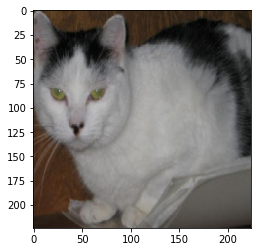

In [42]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from PIL import Image
# load the model
model = VGG16()
# load an image from file
image = load_img('/Users/imac/Desktop/image-dataset/_test/cat/cat_0077.jpg', target_size=(224, 224))
#display image
import matplotlib.pyplot as plt
#test_image = image.load_img(image)
plt.imshow(image)
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

In [43]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
import pandas as pd

#### Handling my Dataset

In [12]:
path=[]
label=[]
import os
for dirname, _, filenames in os.walk('/Users/imac/Desktop/image-dataset/_train'):
    for filename in filenames:
        path.append(os.path.join(dirname, filename))    
        label.append(os.path.basename(dirname))

In [13]:
df_train = pd.DataFrame(list(zip(path, label)), 
               columns =['Path', 'Label'])

In [14]:
df_train=df_train[1:-1]
df_train['Label'].unique()

array(['cat', 'car', 'fruit', 'dog', 'person', 'flower', 'motorbike',
       'airplane'], dtype=object)

In [15]:
path=[]
label=[]
import os
for dirname, _, filenames in os.walk('/Users/imac/Desktop/image-dataset/_test'):
    for filename in filenames:
        path.append(os.path.join(dirname, filename))    
        label.append(os.path.basename(dirname))

In [16]:
df_test = pd.DataFrame(list(zip(path, label)), 
               columns =['Path', 'Label'])

In [17]:
df_test=df_test[1:-1]

In [18]:
from sklearn.utils import shuffle
df_train = shuffle(df_train)
df_test = shuffle(df_test)

In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
datagen=ImageDataGenerator(rescale=1./255.)

#### Setting Batches

In [54]:
train_generator=datagen.flow_from_dataframe(
dataframe=df_train,
directory=None,
x_col="Path",
y_col="Label",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(224,224))

test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
dataframe=df_test,
directory=None,
x_col="Path",
y_col="Label",
batch_size=32,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(224,224))

Found 5958 validated image filenames belonging to 8 classes.
Found 939 validated image filenames belonging to 8 classes.


/usr/local/Cellar/jupyterlab/2.2.5/libexec/lib/python3.8/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="Path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/Cellar/jupyterlab/2.2.5/libexec/lib/python3.8/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="Path". These filename(s) will be ignored.
  warnings.warn(


In [22]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Softmax

#### Original VGG Model Architecture and Parameters

In [44]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Transfer Learning
  

#### Removing Last Softmax Layer from VGG model and Adding Custom softmax layer

In [61]:
model2 = Sequential()

for layer in model.layers[:-1]: # this is where I changed your code
    model2.add(layer)    
# Freeze the layers 
for layer in model2.layers:
    layer.trainable = False

# Add 'softmax' instead of earlier 'prediction' layer.
model2.add(Dense(8, activation='softmax'))

In [62]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [49]:
label_map = (test_generator.class_indices)
print(label_map)

{'airplane': 0, 'car': 1, 'cat': 2, 'dog': 3, 'flower': 4, 'fruit': 5, 'motorbike': 6, 'person': 7}


In [63]:
model2.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])

In [65]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model2.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=5
)

Epoch 1/5
186/186 [==============================] - 1918s 10s/step - loss: 1.5784 - accuracy: 0.5694
Epoch 2/5
186/186 [==============================] - 1859s 10s/step - loss: 1.0180 - accuracy: 0.8665
Epoch 3/5
186/186 [==============================] - 1844s 10s/step - loss: 0.7671 - accuracy: 0.9079
Epoch 4/5
186/186 [==============================] - 2008s 11s/step - loss: 0.6257 - accuracy: 0.9210
Epoch 5/5
186/186 [==============================] - 1921s 10s/step - loss: 0.5366 - accuracy: 0.9290


In [70]:
cd Desktop

/Users/imac/Desktop


In [71]:
model2.save("FineTuned-VGGModel")

INFO:tensorflow:Assets written to: FineTuned-VGGModel/assets


In [72]:
model2.evaluate_generator(generator=test_generator,
steps=STEP_SIZE_TEST)

KeyboardInterrupt: 

#### Predictions

Predicted Class is
7


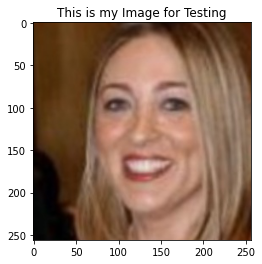

In [80]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image
import numpy as np
test_image = image.load_img('/Users/imac/Desktop/image-dataset/_test/person/person_0099.jpg')
plt.imshow(test_image)
plt.title('This is my Image for Testing')
test_image = test_image.resize((224, 224), Image.ANTIALIAS)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
print("Predicted Class is")
print(model2.predict_classes(test_image)[0])

In [76]:
test_generator.class_indices

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}